# Training RBM and RTRBM on different kinds of artificial data

### Training RBM and RTRBM on RTRBM generated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from data.mock_data import get_rtrbm_data, get_rbm_data
from utils.rbm_vs_rtrbm import train_rbm_rtrbm, infer_and_plot_train_test_rbm_rtrbm

N_H, N_V, T, n_batches = 3, 21, 30, 500

Generating data

100%|██████████| 500/500 [01:38<00:00,  5.06it/s]


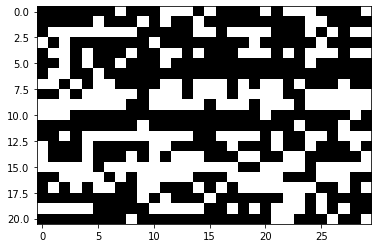

In [2]:
generated, data, rt = get_rtrbm_data(n_batches=n_batches)

train = data[..., :400]
test = data[..., 400:]

plt.imshow(data[..., 0], cmap=plt.get_cmap('binary'), aspect='auto')
plt.show()

Training

In [24]:
rbm, rtrbm = train_rbm_rtrbm(
    train,
    N_H=3,
    device='cpu',
    n_epochs=1000,
    lr=3e-5,
    return_machines=True,
    rtrbm_batch_size=10,
    rbm_batch_size=15  # this ratio of batch sizes seems to induce equal convergence
)

training RBM...


100%|██████████| 1000/1000 [08:23<00:00,  1.98it/s]


training RTRBM...


100%|██████████| 1000/1000 [20:33<00:00,  1.23s/it]


Saving

In [27]:
torch.save(rtrbm, '../../results/RBM vs RTRBM on different artificial data/rtrbm_rtrbm.pt')
torch.save(rbm, '../../results/RBM vs RTRBM on different artificial data/rtrbm_rbm.pt')
torch.save(data, '../../results/RBM vs RTRBM on different artificial data/rtrbm_data.pt')

In [19]:
rbm = torch.load('../../results/RBM vs RTRBM on different artificial data/rtrbm_rbm.pt')
rtrbm = torch.load('../../results/RBM vs RTRBM on different artificial data/rtrbm_rtrbm.pt')
data = torch.load('../../results/RBM vs RTRBM on different artificial data/rtrbm_data.pt')
train = data[..., :400]
test = data[..., 400:]

Inferring: Train and test set

100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


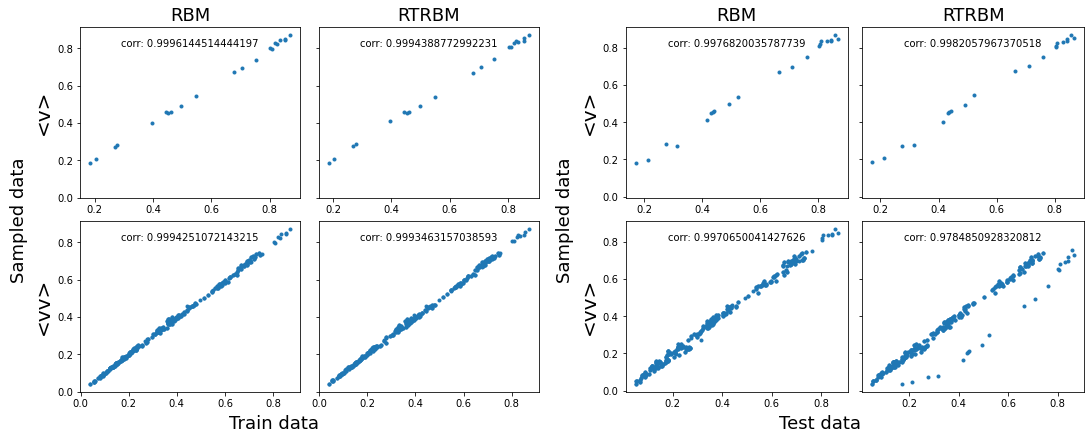

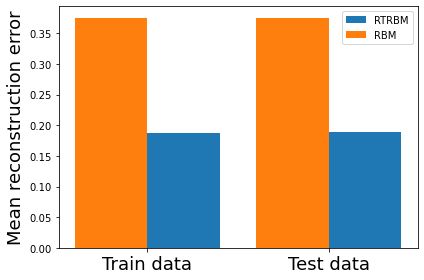

In [20]:
rtrbm_errors = infer_and_plot_train_test_rbm_rtrbm(rbm, rtrbm, train, test, pre_gibbs_k=100, gibbs_k=100)

### Training RBM and RTRBM on RBM generated data

Generating data

100%|██████████| 500/500 [00:54<00:00,  9.22it/s]


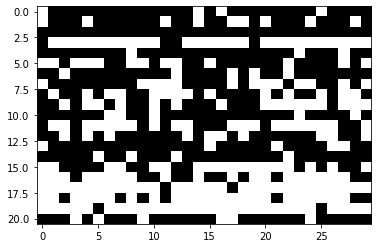

In [34]:
generated, data, rt = get_rbm_data(n_batches=n_batches)

train = data[..., :400]
test = data[..., 400:]

plt.imshow(data[..., 0], cmap=plt.get_cmap('binary'), aspect='auto')
plt.show()

Training

In [35]:
rbm, rtrbm = train_rbm_rtrbm(
    train,
    N_H=3,
    device='cpu',
    n_epochs=100,
    lr=1e-4,
    return_machines=True,
    rtrbm_batch_size=10,
    rbm_batch_size=15
)

training RBM...


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


training RTRBM...


100%|██████████| 100/100 [02:07<00:00,  1.28s/it]


In [36]:
torch.save(rtrbm, '../../results/RBM vs RTRBM on different artificial data/rbm_rtrbm.pt')
torch.save(rbm, '../../results/RBM vs RTRBM on different artificial data/rbm_rbm.pt')
torch.save(data, '../../results/RBM vs RTRBM on different artificial data/rbm_data.pt')

In [21]:
rbm = torch.load('../../results/RBM vs RTRBM on different artificial data/rbm_rbm.pt')
rtrbm = torch.load('../../results/RBM vs RTRBM on different artificial data/rbm_rtrbm.pt')
data = torch.load('../../results/RBM vs RTRBM on different artificial data/rbm_data.pt')
train = data[..., :400]
test = data[..., 400:]

Inferring train and test set

100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


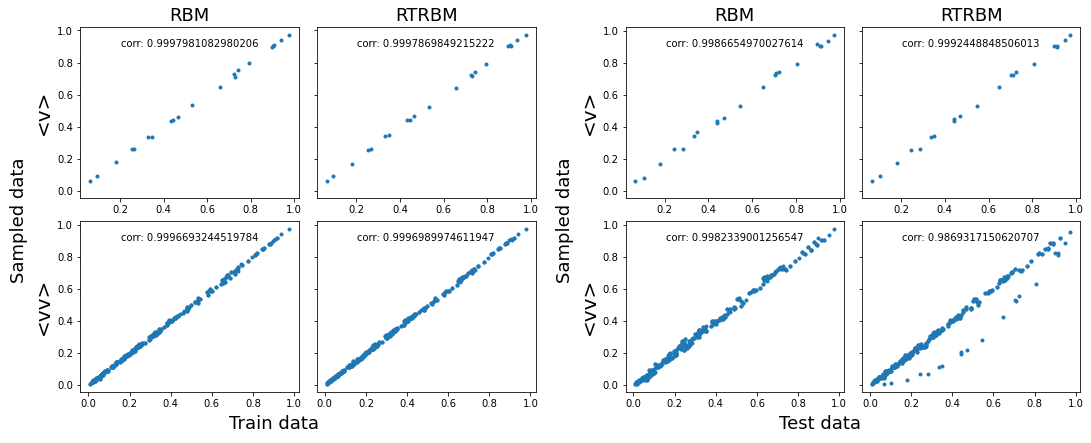

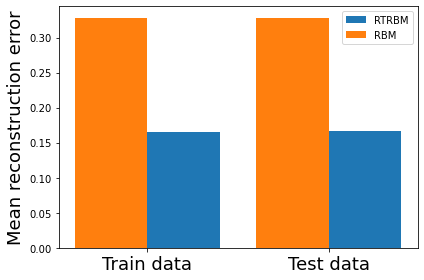

In [22]:
rbm_errors = infer_and_plot_train_test_rbm_rtrbm(rbm, rtrbm, train, test, pre_gibbs_k=100, gibbs_k=100)

### Training RBM and RTRBM on Poisson data

Generating the data

In [2]:
from data.poisson_data import PoissonTimeShiftedData

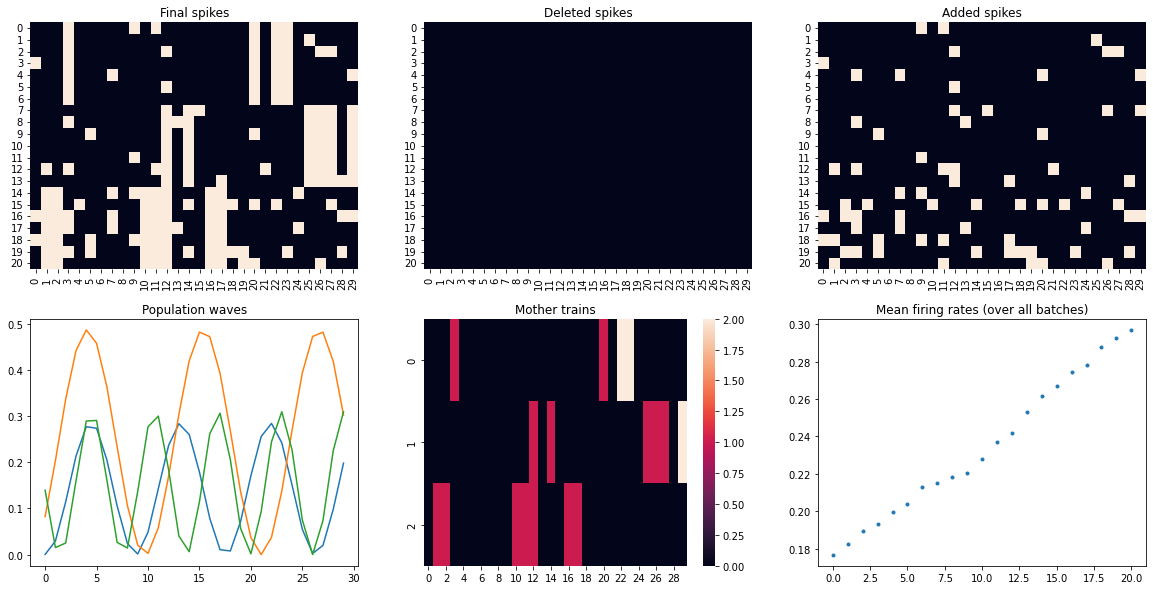

In [3]:
poisson = PoissonTimeShiftedData(
    neurons_per_population=N_V//N_H,
    n_populations=N_H,
    n_batches=n_batches,
    time_steps_per_batch=T,
    temporal_connections=torch.zeros(N_H, N_H),  # no temporal connections
    amplitude_range=[.05, .3]
)

poisson.add_noise(sigma=.1, range=.7, delete_spikes=False)

train = poisson.data[..., :400]
test = poisson.data[..., 400:]

poisson.plot_stats()
plt.show()

Training

In [4]:
rbm, rtrbm = train_rbm_rtrbm(
    train,
    N_H=3,
    device='cpu',
    n_epochs=2000,
    lr=1e-4,
    return_machines=True,
    rtrbm_batch_size=10,
    rbm_batch_size=15
)

training RBM...


100%|██████████| 2000/2000 [16:33<00:00,  2.01it/s]


training RTRBM...


100%|██████████| 2000/2000 [40:58<00:00,  1.23s/it]


Save

In [11]:
torch.save(rtrbm, '../../results/RBM vs RTRBM on different artificial data/p_rtrbm.pt')
torch.save(rbm, '../../results/RBM vs RTRBM on different artificial data/p_rbm.pt')
torch.save([train, test], '../../results/RBM vs RTRBM on different artificial data/p_data.pt')

In [ ]:
rtrbm = torch.load('../../results/RBM vs RTRBM on different artificial data/p_rtrbm.pt')
rbm = torch.load('../../results/RBM vs RTRBM on different artificial data/p_rbm.pt')
train, test = torch.load('../../results/RBM vs RTRBM on different artificial data/p_data.pt')

Infer and plot (results of this vary a lot)

100%|██████████| 100/100 [00:01<00:00, 56.79it/s]


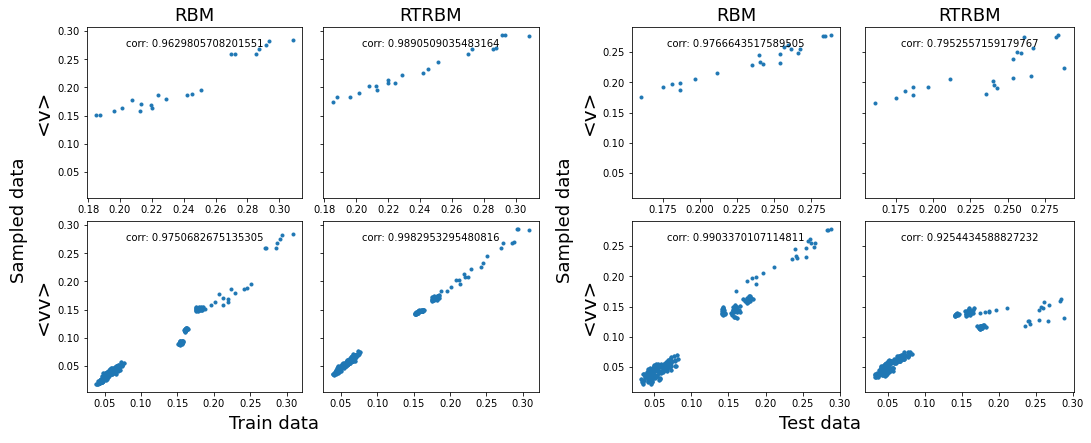

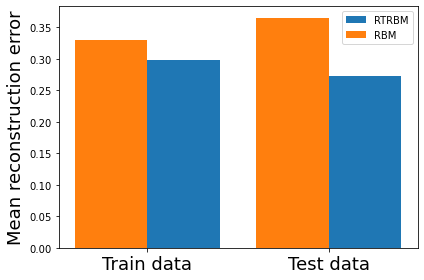

In [10]:
p_errors = infer_and_plot_train_test_rbm_rtrbm(rbm, rtrbm, train, test, pre_gibbs_k=0, gibbs_k=10)

### Training RBM and RTRBM on Poisson-Time-Shifted data

Generate data

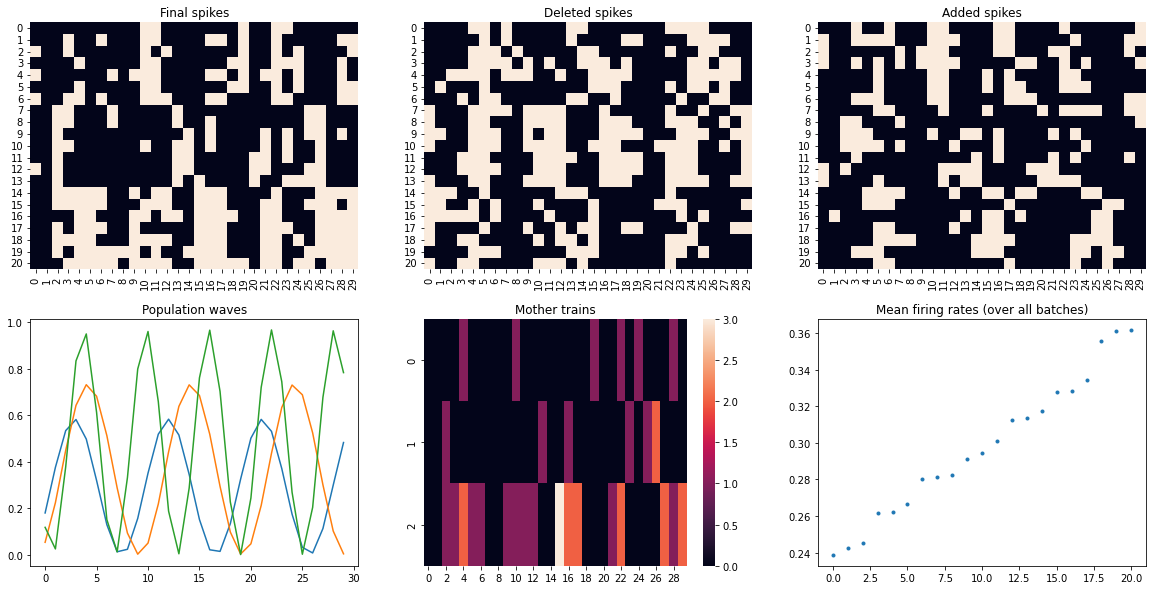

In [13]:
temporal_conn = torch.tensor([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
])

poisson = PoissonTimeShiftedData(
    neurons_per_population=N_V//N_H,
    n_populations=N_H,
    n_batches=n_batches,
    time_steps_per_batch=T,
    temporal_connections=temporal_conn
)

train = poisson.data[..., :400]
test = poisson.data[..., 400:]

poisson.plot_stats()
plt.show()

Training

In [14]:
rbm, rtrbm = train_rbm_rtrbm(
    train,
    N_H=3,
    device='cpu',
    n_epochs=1000,
    lr=1e-4,
    return_machines=True,
    rtrbm_batch_size=10,
    rbm_batch_size=15
)

training RBM...


100%|██████████| 1000/1000 [08:16<00:00,  2.02it/s]


training RTRBM...


100%|██████████| 1000/1000 [20:22<00:00,  1.22s/it]


Save

In [17]:
torch.save(rtrbm, '../../results/RBM vs RTRBM on different artificial data/pts_rtrbm.pt')
torch.save(rbm, '../../results/RBM vs RTRBM on different artificial data/pts_rbm.pt')
torch.save([train, test], '../../results/RBM vs RTRBM on different artificial data/pts_data.pt')

In [12]:
rtrbm = torch.load('../../results/RBM vs RTRBM on different artificial data/pts_rtrbm.pt')
rbm = torch.load('../../results/RBM vs RTRBM on different artificial data/pts_rbm.pt')
train, test = torch.load('../../results/RBM vs RTRBM on different artificial data/pts_data.pt')

FileNotFoundError: [Errno 2] No such file or directory: '../../results/RBM vs RTRBM on different artificial data/pts_data.pt'

Infer and plot

100%|██████████| 100/100 [00:20<00:00,  4.93it/s]


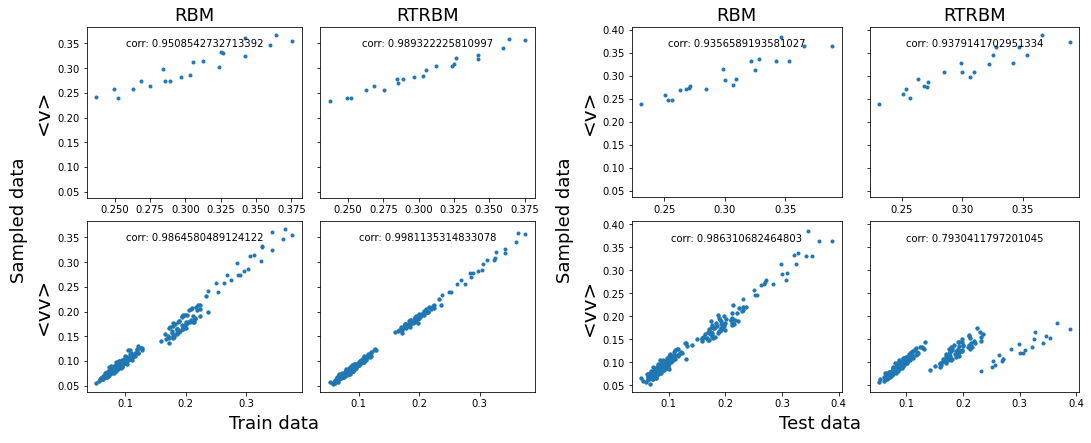

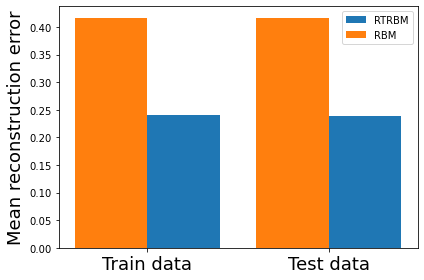

In [16]:
pts_errors = infer_and_plot_train_test_rbm_rtrbm(rbm, rtrbm, train, test, pre_gibbs_k=100, gibbs_k=100)

### On zebrafish data

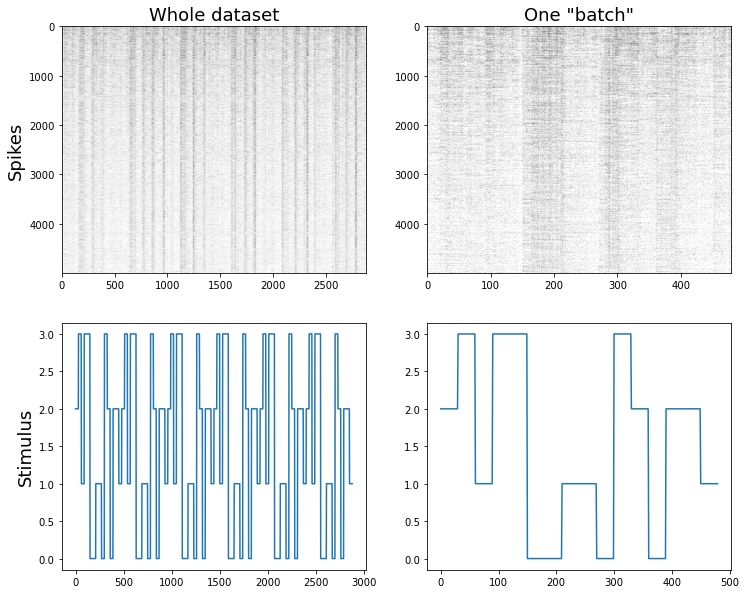

In [2]:
from data.load_data import load_data

neurons = 5000

spikes, behavior, coordinates, df, stimulus = load_data(data_path='/mnt/data/zebrafish/chen2018/subject_1/Deconvolved/subject_1_reconv_spikes.h5')

# sort spikes by ascending firing rate
firing_rates = np.mean(spikes, 1)
sort_idx = np.argsort(firing_rates)[::-1]
firing_rates_sorted = firing_rates[sort_idx]
data = spikes[sort_idx, :] > .15
data = torch.tensor(data[:neurons, :], dtype=torch.float)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(data, cmap=plt.get_cmap('binary'), aspect='auto')
axes[1, 0].plot(stimulus)

axes[0, 1].imshow(data[:, :480], cmap=plt.get_cmap('binary'), aspect='auto')
axes[1, 1].plot(stimulus[:480])

axes[0, 0].set_ylabel('Spikes', fontsize=18)
axes[1, 0].set_ylabel('Stimulus', fontsize=18)
axes[0, 0].set_title('Whole dataset', fontsize=18)
axes[0, 1].set_title('One "batch"', fontsize=18)

plt.show()

Seperate in batches of size 480

In [3]:
batch_size = 480

batched_data = torch.empty(neurons, batch_size, data.shape[1] // batch_size)
for j, i in enumerate(range(0, data.shape[1], batch_size)):
    batched_data[..., j] = data[:, i:i+batch_size]
train = batched_data[..., (0, 1, 3, 5)]
test = batched_data[..., (2, 4)]

Training

In [8]:
rbm, rtrbm = train_rbm_rtrbm(
    train,
    N_H=50,
    device='cuda',
    n_epochs=1000,
    lr=1e-4,
    return_machines=True,
    rtrbm_batch_size=1,
    rbm_batch_size=480
)

training RBM...


100%|██████████| 1000/1000 [20:19<00:00,  1.22s/it]


training RTRBM...


100%|██████████| 1000/1000 [08:53<00:00,  1.87it/s]


In [27]:
from boltzmann_machines.cp_rbm import RBM
rbm = RBM(train, N_H=50, debug_mode=True, device='cuda')
rbm.learn(
    n_epochs=5000,
    lr=1e-4,
    batch_size=100,
)

100%|██████████| 5000/5000 [02:54<00:00, 28.65it/s]


Save

In [29]:
torch.save(rtrbm, '../../results/RBM vs RTRBM on different artificial data/zebra_rtrbm.pt')
torch.save(rbm, '../../results/RBM vs RTRBM on different artificial data/zebra_rbm.pt')

Infer and plot

In [30]:
rbm = torch.load('../../results/RBM vs RTRBM on different artificial data/zebra_rbm.pt', map_location='cpu')
rtrbm = torch.load('../../results/RBM vs RTRBM on different artificial data/zebra_rtrbm.pt', map_location='cpu')

In [31]:
rbm.device = 'cpu'
rtrbm.device = 'cpu'

100%|██████████| 2/2 [00:00<00:00,  6.02it/s]


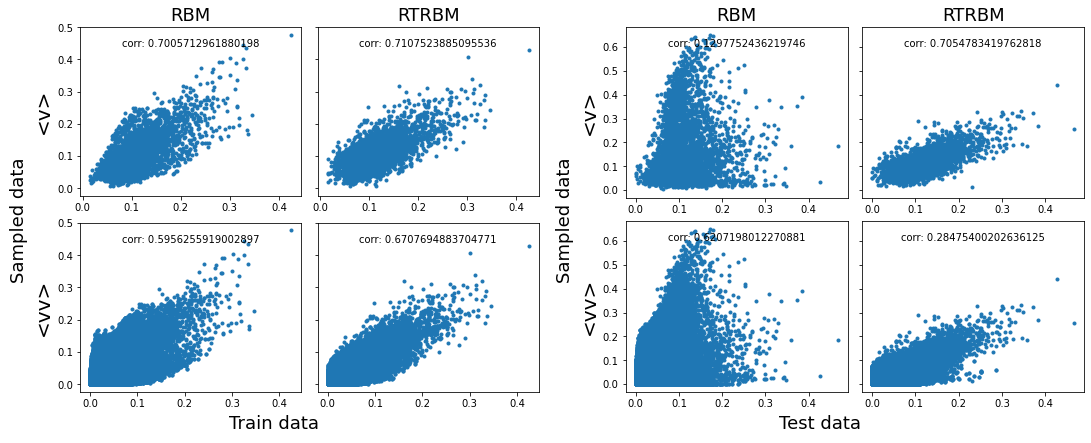

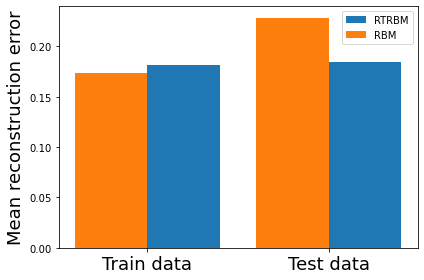

In [36]:
zebra_errors = [infer_and_plot_train_test_rbm_rtrbm(rbm, rtrbm, train, test)]

## Summary

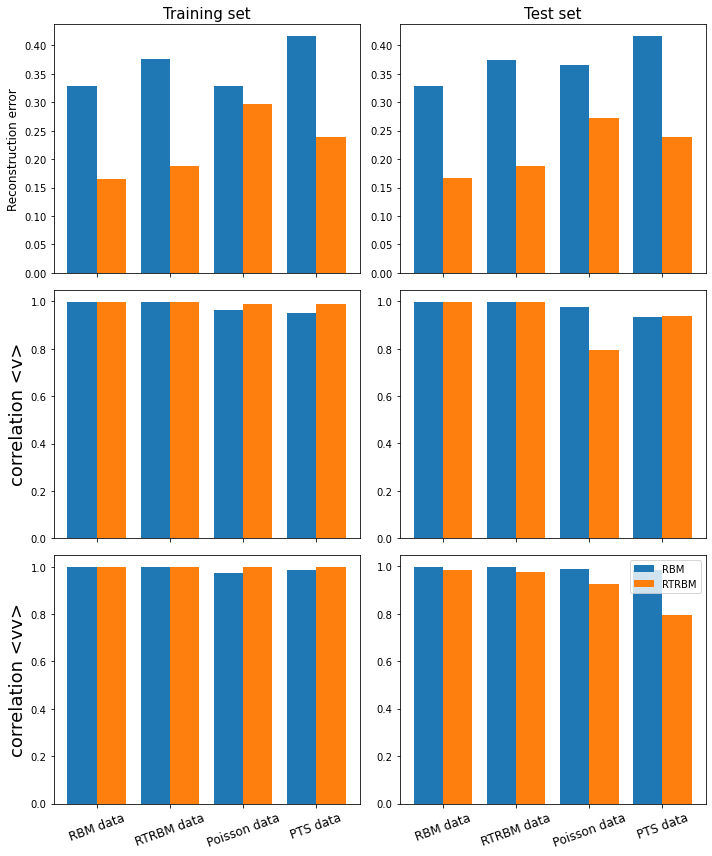

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True)
x_ax = np.arange(4)
for i, (rbm, rtrbm, p, pts) in enumerate(zip(rbm_errors, rtrbm_errors, p_errors, pts_errors)):
    if i < 6:
        ax = axes[i // 2, 0]
    else:
        ax = axes[i // 2 - 3, 1]
    if i % 2 == 0:
        label = 'RBM'
        shift = -.2
    else:
        label = 'RTRBM'
        shift = .2


    ax.bar(x_ax+shift, [rbm, rtrbm, p, pts], label=label, width=.4)
axes[0, 0].set_ylabel('Reconstruction error', fontsize=12)
axes[1, 0].set_ylabel('correlation <v>', fontsize=18)
axes[2, 0].set_ylabel('correlation <vv>', fontsize=18)
axes[0, 0].set_title('Training set', fontsize=15)
axes[2, 0].set_xticks(x_ax, ['RBM data', 'RTRBM data', 'Poisson data', 'PTS data'], rotation=20, fontsize=12)
axes[0, 1].set_title('Test set', fontsize=15)
axes[2, 1].set_xticks(x_ax, ['RBM data', 'RTRBM data', 'Poisson data', 'PTS data'], rotation=20, fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## Final question: How well did the RTRBM learn hidden structure of PTS data?

In [100]:
rtrbm = torch.load('../../results/RBM vs RTRBM on different artificial data/pts_rtrbm.pt')

In [ ]:
import seaborn as sns

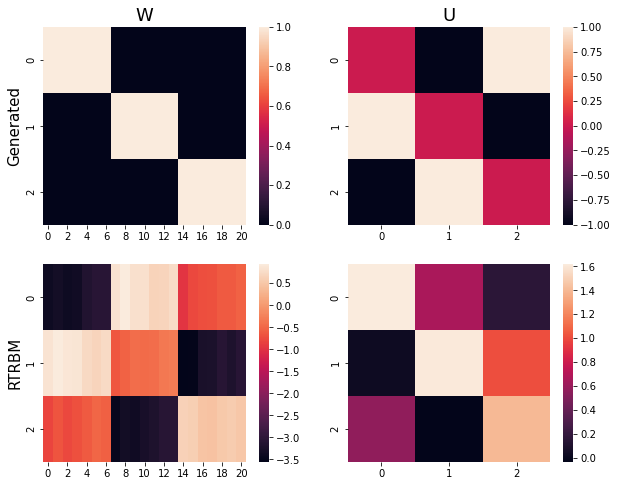

In [113]:
W = torch.zeros(N_H, N_V)
W[0, :7] = 1
W[1, 7:14] = 1
W[2, 14:21] = 1

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.heatmap(W, ax=axes[0, 0])
sns.heatmap(rtrbm.W, ax=axes[1, 0])
sns.heatmap(temporal_conn, ax=axes[0, 1])
sns.heatmap(rtrbm.U, ax=axes[1, 1])

axes[0, 0].set_title('W', fontsize=18)
axes[0, 1].set_title('U', fontsize=18)
axes[0, 0].set_ylabel('Generated', fontsize=15)
axes[1, 0].set_ylabel('RTRBM', fontsize=15)
plt.show()

Interestingly, it seems the RTRBM learns an alternative representation!